In [9]:
import pandas as pd

df = pd.read_csv("data/dataframe.csv")
df.head()

from sklearn.model_selection import train_test_split

X = df.drop("y", axis=1).values
y = df["y"].values

In [7]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X, y)

oversampler = RandomOverSampler(random_state=42)
X_res, y_res = oversampler.fit_resample(X,y)

In [3]:
#X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 42, test_size = 0.33)

In [4]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(criterion = "entropy", n_estimators = 30)
#model.fit(X_train, y_train)

#print(model.score(X_test, y_test))

0.9287079510703364


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,20,30,40,50,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3],
              'criterion': ["entropy","gini","log_loss"]
           }

grid = GridSearchCV(model,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_res,y_res)

C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3024 fits failed out of a total of 9072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3024 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    val

In [5]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
Best score is: 0.8690386071158214


In [5]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.90      0.93      0.91       451
          15       0.94      0.96      0.95       427
          16       0.99      1.00      0.99       454
          21       0.95      1.00      0.97       446
          33       0.92      0.87      0.89       453
          34       1.00      1.00      1.00       420
          39       1.00      1.00      1.00       433
          56       0.89      0.89      0.89       444
          68       0.82      0.85      0.83       438
          95       0.96      1.00      0.98       409
        1000       0.93      0.81      0.86       408
        1001       0.85      0.84      0.85       449

    accuracy                           0.93      5232
   macro avg       0.93      0.93      0.93      5232
weighted avg       0.93      0.93      0.93      5232



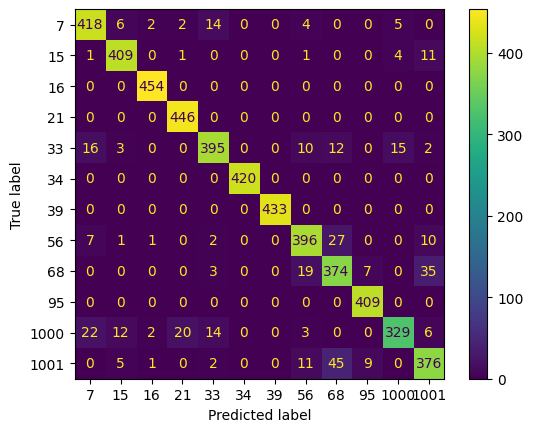

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()